# Introduction to BIDS and `PyBIDS`
[Brain Imaging Data Structure (**BIDS**)](https://bids-specification.readthedocs.io/en/stable/) is a a standard for organizing and describing neuroimaging (and behavioural) datasets. See [BIDS paper](https://doi.org/10.1038/sdata.2016.44) and http://bids.neuroimaging.io website for more information.

`PyBids` is a Python module to interface with datasets conforming BIDS. See the [documentation](https://bids-standard.github.io/pybids/) and [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7409983/) for more info. `PyBids` can be installed with `pip install pybids` command.

**Here we will explore some of the functionality of pybids.layout.** The material is adapted from https://github.com/bids-standard/pybids/tree/master/examples

## The `BIDSLayout`
A `BIDSLayout` is a Python class that represents a BIDS project file tree and provides a variety of helpful methods for querying and manipulating BIDS files. The `BIDSLayout` initializer has a large number of arguments you can use to control the way files are indexed and accessed. But usually you'd initialise a `BIDSLayout` with just its root path location.

In [1]:
3+8

11

In [30]:
import os
from bids.layout import BIDSLayout

ds_path = 'FaceRecognition/data/bids'

# Initialize the layout
layout = BIDSLayout(ds_path)

# Print some basic information about the layout
layout

BIDS Layout: ...s-on/FaceRecognition/data/bids | Subjects: 2 | Sessions: 0 | Runs: 18

### Querying the BIDSLayout
The main method for querying `BIDSLayout` is `.get()`.

If we call `.get()` with no additional arguments, we get back a list of all the BIDS files in our dataset.

In [31]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 5 files are:")
all_files[:5]

There are 79 files in the layout.

The first 5 files are:


[<BIDSFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/CHANGES'>,
 <BIDSJSONFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/dataset_description.json'>,
 <BIDSJSONFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/participants.json'>,
 <BIDSDataFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/participants.tsv'>,
 <BIDSFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/README'>]

The returned object is a **Python list**. Each element in the list is a `BIDSFile` object. 

We can also get just filenames.

In [32]:
layout.get(return_type='filename')[:5]

['/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/CHANGES',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/dataset_description.json',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/participants.json',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/participants.tsv',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/README']

We can also get such information as
* all `subject` IDs
* all `task` names
* dataset `description`
* the BOLD repetition time TR
* how many `runs` there are

In [33]:
layout.get_subjects()

['03', '04']

In [34]:
layout.get_tasks()

['facerecognition']

In [35]:
layout.get_dataset_description()

{'Acknowledgements': 'TODO: whom you want to acknowledge',
 'Authors': ['TODO:', 'First1 Last1', 'First2 Last2', '...'],
 'BIDSVersion': '1.4.1',
 'DatasetDOI': 'TODO: eventually a DOI for the dataset',
 'Funding': ['TODO', 'GRANT #1', 'GRANT #2'],
 'HowToAcknowledge': 'TODO: describe how to acknowledge -- either cite a corresponding paper, or just in acknowledgement section',
 'License': 'TODO: choose a license, e.g. PDDL (http://opendatacommons.org/licenses/pddl/)',
 'Name': 'TODO: name of the dataset',
 'ReferencesAndLinks': ['TODO', 'List of papers or websites']}

In [36]:
layout.get_tr()

2.0

Regarding runs, it might be that there are varied number of runs accross participants. So, let's get runs for each participant. 

In [37]:
for sID in layout.get_subjects(): 
    print(layout.get_runs(subject = sID))

[01, 02, 03, 04, 05, 06, 07, 08, 09]
[01, 02, 03, 04, 05, 06, 07, 08, 09]


### Filtering files by entities
We can pass any BIDS-defined entities (keywords) to `.get()` method. For example, here's how we would retrieve all BOLD runs with `.nii.gz` extensions for subject `04`.

In [38]:
# Retrieve filenames of all BOLD runs for subject 01
layout.get(subject='04', extension='nii.gz', suffix='bold', return_type='filename')

['/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-01_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-02_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-03_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-04_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-05_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04/func/sub-04_task-facerecognition_run-06_bold.nii.gz',
 '/imaging/correia/dace/training/summer-school/COGNE

All of the entities are found in the names of BIDS files. For example `sub-01_task-facerecognition_run-01_bold.nii.gz` has entities: **subject** **task** **run** **suffix** **extension**.

You can get the list of all availabe entities by `layout.get_entities()`.

Here are a few of the most common entities:

* `suffix`: The part of a BIDS filename just before the extension (e.g., 'bold', 'events', 'T1w', etc.).
* `subject`: The subject label
* `session`: The session label
* `run`: The run index
* `task`: The task name

In [39]:
layout.get_entities()

{'subject': <Entity subject (pattern=[/\\]+sub-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'session': <Entity session (pattern=[_/\\]+ses-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'sample': <Entity sample (pattern=[_/\\]+sample-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'task': <Entity task (pattern=[_/\\]+task-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'acquisition': <Entity acquisition (pattern=[_/\\]+acq-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'ceagent': <Entity ceagent (pattern=[_/\\]+ce-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'staining': <Entity staining (pattern=[_/\\]+stain-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'tracer': <Entity tracer (pattern=[_/\\]+trc-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'reconstruction': <Entity reconstruction (pattern=[_/\\]+rec-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'direction': <Entity direction (pattern=[_/\\]+dir-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'run': <Entity run (pattern=[_/\\]+run-(\d+), dtype=<class 'bids.layout.utils.PaddedInt'>)>,
 'proc': <Enti

### Filtering by metadata
Sometimes we want to search for files based not just on their names, but also based on metadata defined in JSON files. We can pass any key that occurs in any JSON file in our project as an argument to `.get()`. We can combine these with any number of core BIDS entities (like `subject`, `run`, etc.).

For example, we want to retrieve `SpacingBetweenSlices` for all our subjects. And let's create a nice data frame of this information.

In [40]:
import pandas as pd
d = []
for subject in layout.get_subjects():
    d.append(
        {
            'subject': subject,
            'spacing': layout.get_SpacingBetweenSlices(subject=subject, suffix='bold')
        }
    )
df = pd.DataFrame(d)
df = df.sort_values(by=['subject'])

print(df.to_string(index=False))

subject spacing
     03   [3.9]
     04   [3.9]


### Other `return_type` values
We can also ask `get()` to return unique values (or IDs) of particular entities. For example, we want to know which subjects have at least one `T1w` file. We can request that information by setting `return_type='id'`. When using this option, we also need to specify a target entity (or metadata keyword) called `target`. This combination tells the `BIDSLayout` to return the unique values for the specified `target` entity. 

For example, in the next example, we ask for all of the unique subject IDs that have at least one file with a `phasediff` suffix. 

In [41]:
# Ask get() to return the ids of subjects that have phasediff (fieldmap_ files
layout.get(return_type='id', target='subject', suffix='phasediff')

['03', '04']

If our `target` is a BIDS entity that corresponds to a particular directory in the BIDS specification (e.g., `subject` or `session`) we can also use `return_type='dir'` to get all matching subdirectories. 

In [42]:
layout.get(return_type='dir', target='subject')

['/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-03',
 '/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-04']

## The `BIDSFile`
When you call `.get()` on a `BIDSLayout`, the default returned values are objects of class `BIDSFile`. A `BIDSFile` is a lightweight container for individual files in a BIDS dataset. It provides easy access to a variety of useful attributes and methods. Let's take a closer look. First, let's pick a random file from our existing `layout`.

In [43]:
# Pick the 7th file in the dataset
bf = layout.get()[7]
# Print it
bf

<BIDSImageFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-03/anat/sub-03_acq-mprage_T1w.nii.gz'>

Here are some of the attributes and methods available to us in a `BIDSFile` (note that some of these are only available for certain subclasses of `BIDSFile`; e.g., you can't call `get_image()` on a `BIDSFile` that doesn't correspond to an image file!):
* `.path`: The full path of the associated file
* `.filename`: The associated file's filename (without directory)
* `.dirname`: The directory containing the file
* `.get_entities()`: Returns information about entities associated with this `BIDSFile` (optionally including metadata)
* `.get_image()`: Returns the file contents as a nibabel image (only works for image files)
* `.get_df()`: Get file contents as a pandas DataFrame (only works for TSV files)
* `.get_metadata()`: Returns a dictionary of all metadata found in associated JSON files
* `.get_associations()`: Returns a list of all files associated with this one in some way

Let's see some of these in action.

In [44]:
# Print all the entities associated with this file, and their values
bf.get_entities()

{'acquisition': 'mprage',
 'datatype': 'anat',
 'extension': '.nii.gz',
 'subject': '03',
 'suffix': 'T1w'}

In [45]:
# Print all the metadata associated with this file
bf.get_metadata()

{'AcquisitionMatrixPE': 246,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '13:57:46.282500',
 'BaseResolution': 256,
 'CoilCombinationMethod': 'Adaptive Combine',
 'CoilString': 'T:HEA;HEP',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20220720',
 'DeviceSerialNumber': '35119',
 'DwellTime': 8.5e-06,
 'EchoTime': 0.00298,
 'FlipAngle': 9,
 'HeudiconvVersion': '0.11.3',
 'ImageComments': 'V',
 'ImageOrientationPatientDICOM': [0, 1, 0, 0.052336, 0, -0.99863],
 'ImageOrientationText': 'Sag>Tra(-3.0)',
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM'],
 'ImagingFrequency': 123.252,
 'InPlanePhaseEncodingDirectionDICOM': 'ROW',
 'InstitutionAddress': 'Chaucer Road  15,Cambridge,UK,GB,CB2 2EF',
 'InstitutionName': 'MRC-CBU',
 'InversionTime': 0.9,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'TrioTim',
 'MatrixCoilMode': 'GRAPPA',
 'Modality': 'MR',
 'NonlinearGradientCorrection': True,
 'Para

In [46]:
# We can the union of both of the above in one shot like this
bf.get_entities(metadata='all')

{'AcquisitionMatrixPE': 246,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '13:57:46.282500',
 'BaseResolution': 256,
 'CoilCombinationMethod': 'Adaptive Combine',
 'CoilString': 'T:HEA;HEP',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20220720',
 'DeviceSerialNumber': '35119',
 'DwellTime': 8.5e-06,
 'EchoTime': 0.00298,
 'FlipAngle': 9,
 'HeudiconvVersion': '0.11.3',
 'ImageComments': 'V',
 'ImageOrientationPatientDICOM': [0, 1, 0, 0.052336, 0, -0.99863],
 'ImageOrientationText': 'Sag>Tra(-3.0)',
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM'],
 'ImagingFrequency': 123.252,
 'InPlanePhaseEncodingDirectionDICOM': 'ROW',
 'InstitutionAddress': 'Chaucer Road  15,Cambridge,UK,GB,CB2 2EF',
 'InstitutionName': 'MRC-CBU',
 'InversionTime': 0.9,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'TrioTim',
 'MatrixCoilMode': 'GRAPPA',
 'Modality': 'MR',
 'NonlinearGradientCorrection': True,
 'Para

Here are all the files associated with our target file in some way.

In [47]:
bf.get_associations()

[<BIDSJSONFile filename='/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-03/anat/sub-03_acq-mprage_T1w.json'>]

`.get_image()`: Returns the file contents as a `nibabel` image (only works for image files). We can then display the image, for example, using `OrthoSlicer3D` which requires `matplotlib`.   

**Note:** When using `orthoview()` in notebook, don't forget to close figures afterward again or use%matplotlib inline again, otherwise, you cannot plot any other figures.

<IPython.core.display.Javascript object>


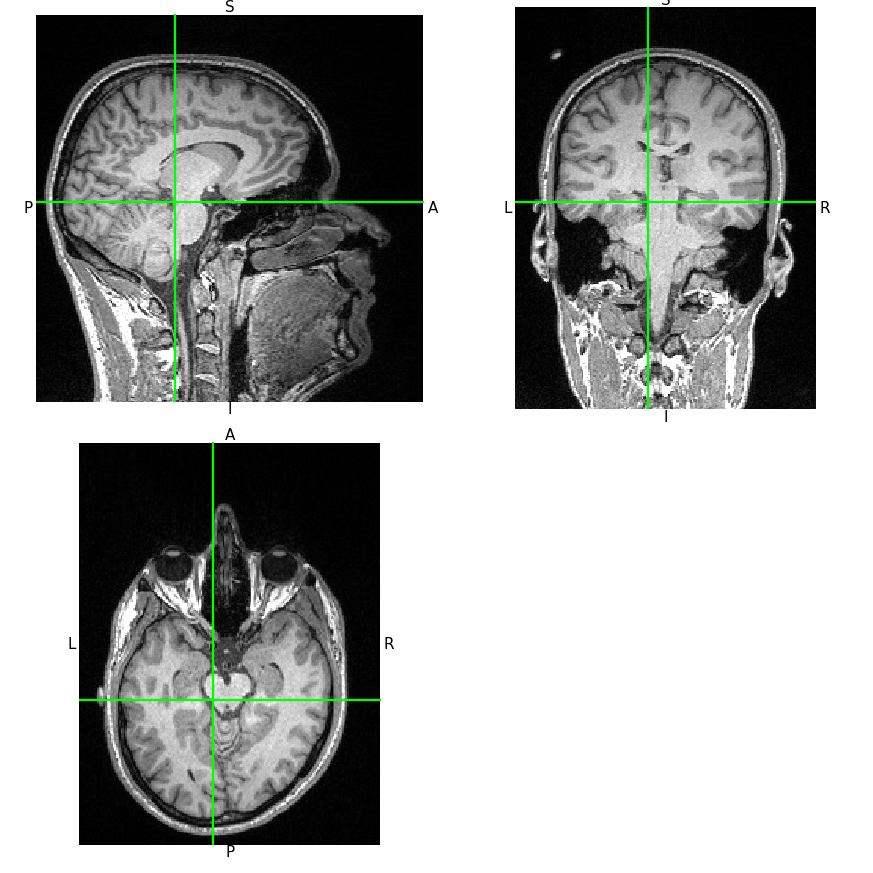

<OrthoSlicer3D: /imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-03/anat/sub-03_acq-mprage_T1w.nii.gz (192, 256, 256)>

In [48]:
import matplotlib.pyplot as plt
%matplotlib notebook

bf.get_image().orthoview()

## `.tsv` files

In cases where a file has a `.tsv.gz` or `.tsv` extension, it will automatically be created as a `BIDSDataFile`, and we can easily grab the contents as a `DataFrame`.

Let's look at the first `events` file from our layout.

In [49]:
# Get the first events file
evfile = layout.get(suffix='events')[0]

# Get contents as a DataFrame and show the first few rows
df = evfile.get_df()
df.head()

,Unnamed: 0,onset,duration,circle_duration,trial_type,trigger,button_pushed,response_time,stim_file
0,0,0.000,0.959,0.403,UNFAMILIAR,13,4.0,1.415,func/u002.bmp
1,1,3.290,0.859,0.554,FAMOUS,5,7.0,1.028,func/f011.bmp
2,2,6.447,0.958,0.430,FAMOUS,5,4.0,1.132,func/f009.bmp
3,3,9.755,0.804,0.584,FAMOUS,6,4.0,0.959,func/f009.bmp
4,4,12.862,0.977,0.531,FAMOUS,5,7.0,1.174,func/f012.bmp


Let's look at the `participants` information. 

In [50]:
participants = layout.get(suffix='participants', extension='tsv')[0]
participants.get_df()

,participant_id,age,sex,group
0,sub-04,26,F,control
1,sub-03,30,M,control


## Other utilities

### Filename parsing
Let's say you have a filename, and you want to manually extract BIDS entities from it. The parse_file_entities method provides the facility:

In [51]:
layout.parse_file_entities('some_path_to_bids_file/sub-04_task-facerecognition_run-01_bold.nii.gz')

{'subject': '04',
 'task': 'facerecognition',
 'run': 01,
 'suffix': 'bold',
 'extension': '.nii.gz'}

You can do the same for `BIDSFile` object that we defined earlier. 

In [52]:
layout.parse_file_entities(bf.path)

{'subject': '03',
 'acquisition': 'mprage',
 'suffix': 'T1w',
 'datatype': 'anat',
 'extension': '.nii.gz'}

### Path construction
You may want to create valid BIDS filenames for files that are new or hypothetical that would sit within your BIDS project. This is useful when you know what entity values you need to write out to, but don’t want to deal with looking up the precise BIDS file-naming syntax. In the example below, imagine we’ve created a new file containing stimulus presentation information, and we want to save it to a `.tsv.gz` file, per the BIDS naming conventions. All we need to do is define a dictionary with the name components, and build_path takes care of the rest (including injecting sub-directories!):

In [53]:
entities = {
    'subject': '01',
    'run': '02',
    'task': 'facerecognition',
    'suffix': 'bold'
}

layout.build_path(entities)

'/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-01/func/sub-01_task-facerecognition_run-02_bold.nii.gz'

Keep in mind that `_` and `-` have special meaning in BIDS specification. E.g., you can't name your task `face-recognition`, that would not be 'spec-compliant' and would end in an error! However, if you add `validate=False`, you can get away with it (i'e', `layout.build_path(entities, validate=False)`). 

You can also use `build_path` in more sophisticated ways by defining your own set of matching templates that cover cases not supported by BIDS out of the box. For example, suppose you want to create a template for naming a new `stat` file. You could do something like:

In [54]:
# Define the pattern to build out of the components passed in the dictionary
pattern = "sub-{subject}[_ses-{session}]_task-{task}[_run-{run}]_{suffix}.nii.gz"

entities = {
    'subject': '01',
    'run': '02',
    'task': 'facerecognition',
    'suffix': 'stat'
}

# Notice we pass the new pattern as the second argument
layout.build_path(entities, pattern, validate=False)

'/imaging/correia/dace/training/summer-school/COGNESTIC-fMRI/hands-on/FaceRecognition/data/bids/sub-01_task-facerecognition_run-02_stat.nii.gz'

### Exporting a `BIDSLayout` to a pandas `Dataframe`
If you want a summary of all the files in your `BIDSLayout`, but don't want to have to iterate `BIDSFile` objects and extract their entities, you can get a nice bird's-eye view of your dataset using the `to_df()` method.

In [55]:
# Convert the layout to a pandas dataframe
df = layout.to_df()
df.head()

/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/layout/layout.py:525: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('path', 'entity', 'value')


entity,path,acquisition,datatype,extension,fmap,run,scans,subject,suffix,task
0,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,.json,NaN,NaN,NaN,NaN,description,NaN
1,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,.json,NaN,NaN,NaN,NaN,participants,NaN
2,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,.tsv,NaN,NaN,NaN,NaN,participants,NaN
3,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,.json,NaN,NaN,NaN,NaN,scans,NaN
4,/imaging/correia/dace/training/summer-school/C...,mprage,anat,.json,NaN,NaN,NaN,03,T1w,NaN


We can also include metadata in the result if we like (which may blow up our `DataFrame` if we have a large dataset). Note that in this case, most of our cells will have missing values.

In [61]:
df = layout.to_df(metadata=True)
df.head()

/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/layout/layout.py:525: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('path', 'entity', 'value')


entity,path,AcquisitionMatrixPE,AcquisitionNumber,AcquisitionTime,BandwidthPerPixelPhaseEncode,BaseResolution,CogAtlasID,CoilCombinationMethod,CoilString,ConversionSoftware,...,group,operator,participant_id,randstr,run,scans,sex,subject,suffix,task
0,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,description,NaN
1,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,participants,NaN
2,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'Description': '(TODO: adjust - by default ev...,NaN,{'Description': 'Participant identifier'},NaN,NaN,NaN,"{'Description': 'self-rated by participant, M ...",NaN,participants,NaN
3,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scans,NaN
4,/imaging/correia/dace/training/summer-school/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,T1w,NaN


## Report generation
`PyBIDS` also allows you to automatically create data acquisition reports based on the available `image` and `meta-data` information. This enables a new level of standardisation and transparency. FAIR-ness, meta-analyses, etc. 

In [57]:
# import the BIDSReport function from the reports submodule
from bids.reports import BIDSReport

Now we only need to apply the `BIDSReport` function to our `layout` and generate our report. 

In your example dataset the report might run into error as the dataset is incomplete. The code below deals with that case. But a successfull report would look something like this:

>In session None, MR data were acquired using a 3-Tesla Siemens TrioTim MRI scanner.
	One run of T1-weighted SP\MP\OSP GR\IR (GR\IR) single-echo structural MRI data were collected (256 slices; repetition time, TR=2250ms; echo time, TE=2.98ms; flip angle, FA=9<deg>; field of view, FOV=192x256mm; matrix size=192x256; voxel size=1x1x1mm).
	A spoiled gradient recalled (GR) field map (phase encoding: anterior to posterior; 33 slices in interleaved ascending order; repetition time, TR=400ms; echo time 1 / 2, TE1/2=5.197.65ms; flip angle, FA=60<deg>; field of view, FOV=192x192mm; matrix size=64x64; voxel size=3x3x3.75mm) was acquired for the first, second, third, fourth, fifth, sixth, seventh, eighth, and ninth runs of the facerecognition BOLD scan.
	Nine runs of facerecognition segmented k-space echo planar (EP) single-echo fMRI data were collected (33 slices in interleaved ascending order; repetition time, TR=2000ms; echo time, TE=30ms; flip angle, FA=78<deg>; field of view, FOV=192x192mm; matrix size=64x64; voxel size=3x3x3.75mm). Run duration was 6:56 minutes, during which 208 volumes were acquired.

>Dicoms were converted to NIfTI-1 format using dcm2niix (v1.0.20220720). This section was (in part) generated automatically using pybids (0.15.3).

In [60]:
# Initialize a report for the dataset
report = BIDSReport(layout)

# Method generate returns a Counter of unique descriptions across subjects
try:
    descriptions = report.generate()
    pub_description = descriptions.most_common()[0][0]
    print(pub_description)
except IndexError:
    print('Sorry, it seems that the dataset is not complete and report cannot be generated.')

Number of patterns detected: 2
Remember to double-check everything and to replace <deg> with a degree symbol.
In session None, MR data were acquired using a 3-Tesla Siemens TrioTim MRI scanner.
	One run of T1-weighted SP\MP\OSP GR\IR (GR\IR) single-echo structural MRI data were collected (256 slices; repetition time, TR=2250ms; echo time, TE=2.98ms; flip angle, FA=9<deg>; field of view, FOV=192x256mm; matrix size=192x256; voxel size=1x1x1mm).
	A spoiled gradient recalled (GR) field map (phase encoding: anterior to posterior; 33 slices in interleaved ascending order; repetition time, TR=400ms; echo time 1 / 2, TE1/2=5.197.65ms; flip angle, FA=60<deg>; field of view, FOV=192x192mm; matrix size=64x64; voxel size=3x3x3.9mm) was acquired for the first, second, third, fourth, fifth, sixth, seventh, eighth, and ninth runs of the facerecognition BOLD scan.
	Nine runs of facerecognition segmented k-space echo planar (EP) single-echo fMRI data were collected (33 slices in interleaved ascending o

/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/reports/parsing.py:387: UserWarning: sub-03_magnitude1.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/reports/parsing.py:387: UserWarning: sub-03_magnitude2.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/layout/models.py:219: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['run'] instead of .run.
  warnings.warn("Accessing entities as attributes is deprecated as "
/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/reports/parsing.py:387: UserWarning: sub-04_magnitude1.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/fMRI/lib/python3.9/site-packages/bids/reports/parsing.py:387: User